<a href="https://colab.research.google.com/github/SHREYA2505/Eda_TheoryDA/blob/main/21BDS0172_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("PININTI SHREYA")
print("21BDS0172")

PININTI SHREYA
21BDS0172


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('exercise.csv')
print(data.shape)
print(data.info())
print(data.describe())
print(data.head())

(15000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      14999 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      14999 non-null  float64
 4   Weight      14999 non-null  float64
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  14999 non-null  float64
 7   Body_Temp   15000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 937.6+ KB
None
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  14999.000000  14999.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465698     74.964598     15.530600   
std    2.872851e+06     16.980264     14.258421     15.033590      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    

Data Cleaning and Handling

In [ ]:
print(data.isnull().sum())
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category')
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
print(data.isnull().sum())

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


Time Series Analysis

In [ ]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    plt.figure(figsize=(10, 6))
    for col in data.select_dtypes(include=np.number).columns:
        plt.plot(data[col], label=col)
    plt.legend()
    plt.title("Time Series Plot")
    plt.show()


Statistical Summary(Univariate Analysis)



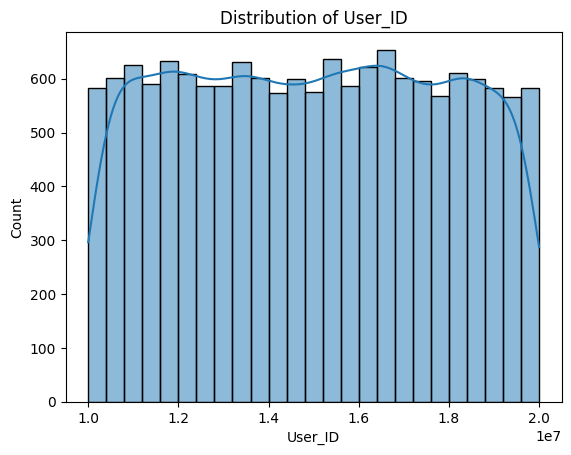

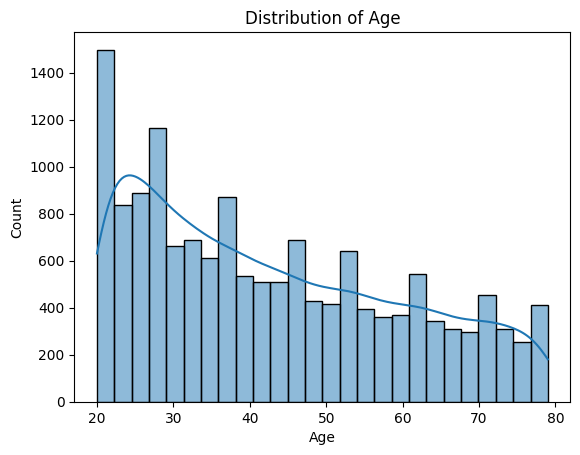

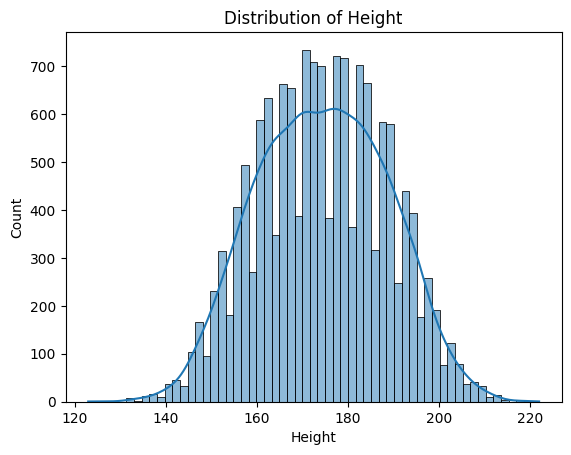

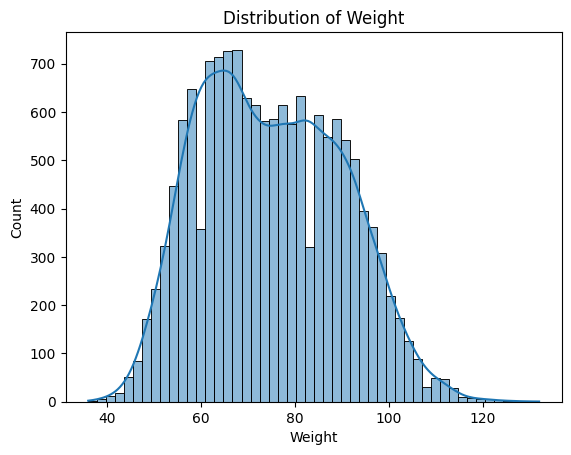

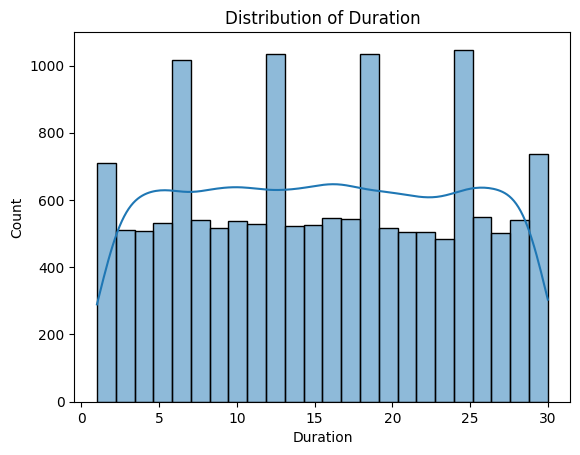

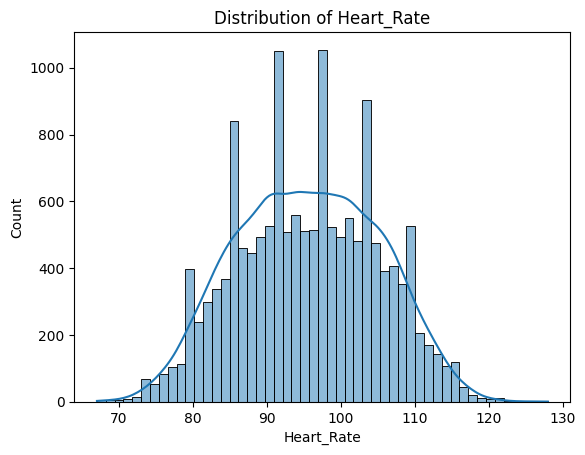

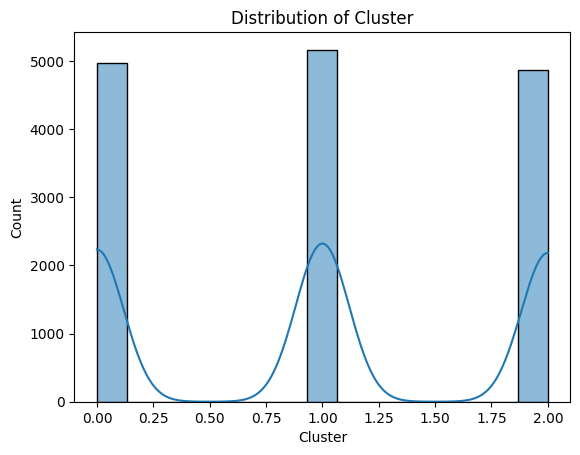

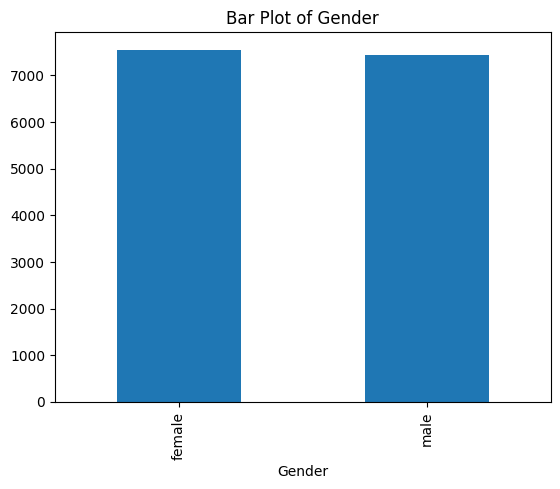

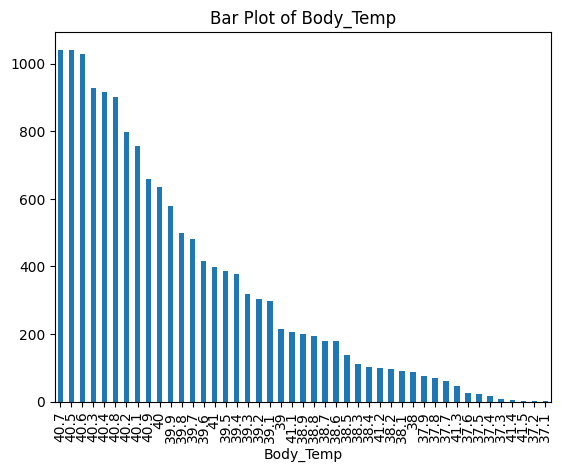

In [ ]:
for col in data.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
for col in data.select_dtypes(include='category').columns:
    plt.figure()
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Plot of {col}")
    plt.show()


Bivariate Analaysis



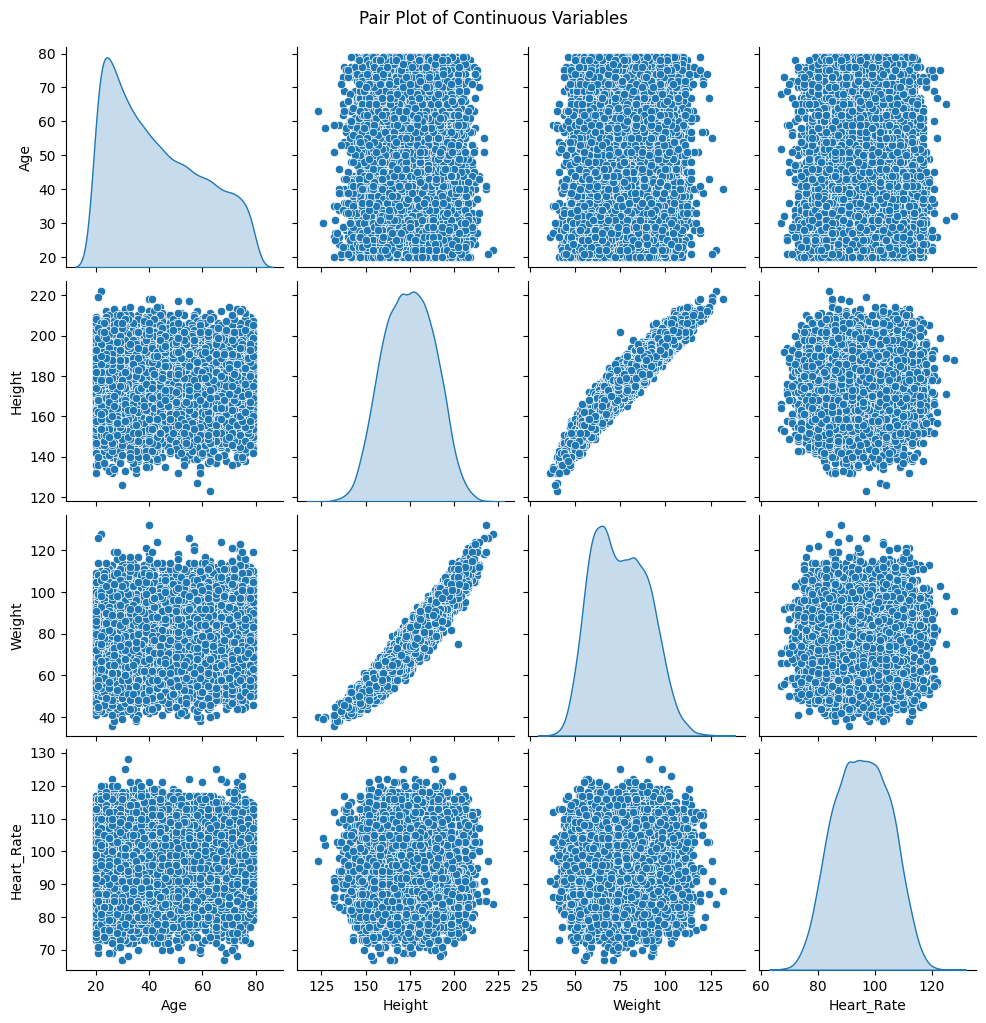

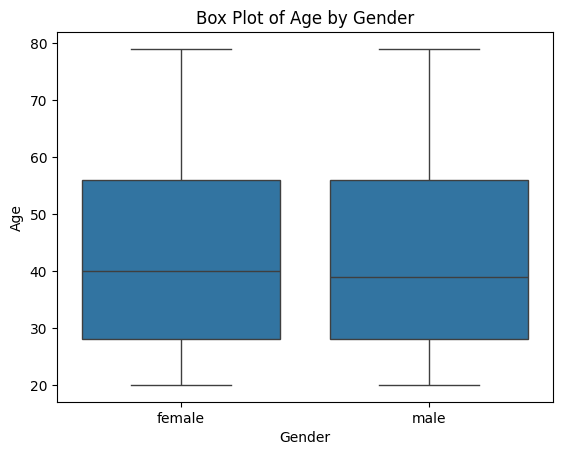

Contingency Table:
Cluster     0     1     2
Gender                   
female    288  3477  3788
male     4681  1691  1075


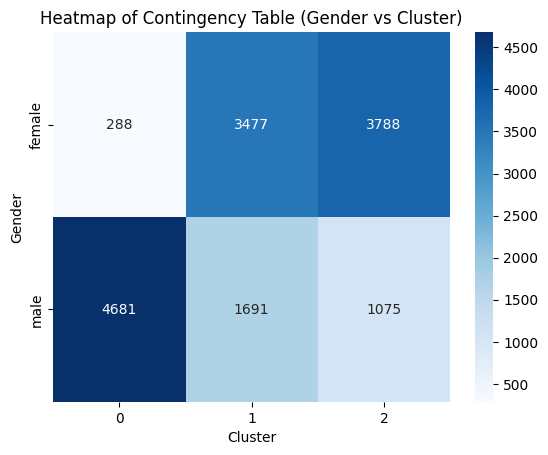

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Continuous vs Continuous (Scatter Plot + Correlation)
sns.pairplot(data[['Age', 'Height', 'Weight', 'Heart_Rate', 'Body_Temp']], diag_kind='kde')
plt.suptitle("Pair Plot of Continuous Variables", y=1.02)
plt.show()
sns.boxplot(x='Gender', y='Age', data=data)
plt.title("Box Plot of Age by Gender")
plt.show()
contingency_table = pd.crosstab(data['Gender'], data['Cluster'])
print("Contingency Table:")
print(contingency_table)
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt='d')
plt.title("Heatmap of Contingency Table (Gender vs Cluster)")
plt.show()


Multivariate Analysis

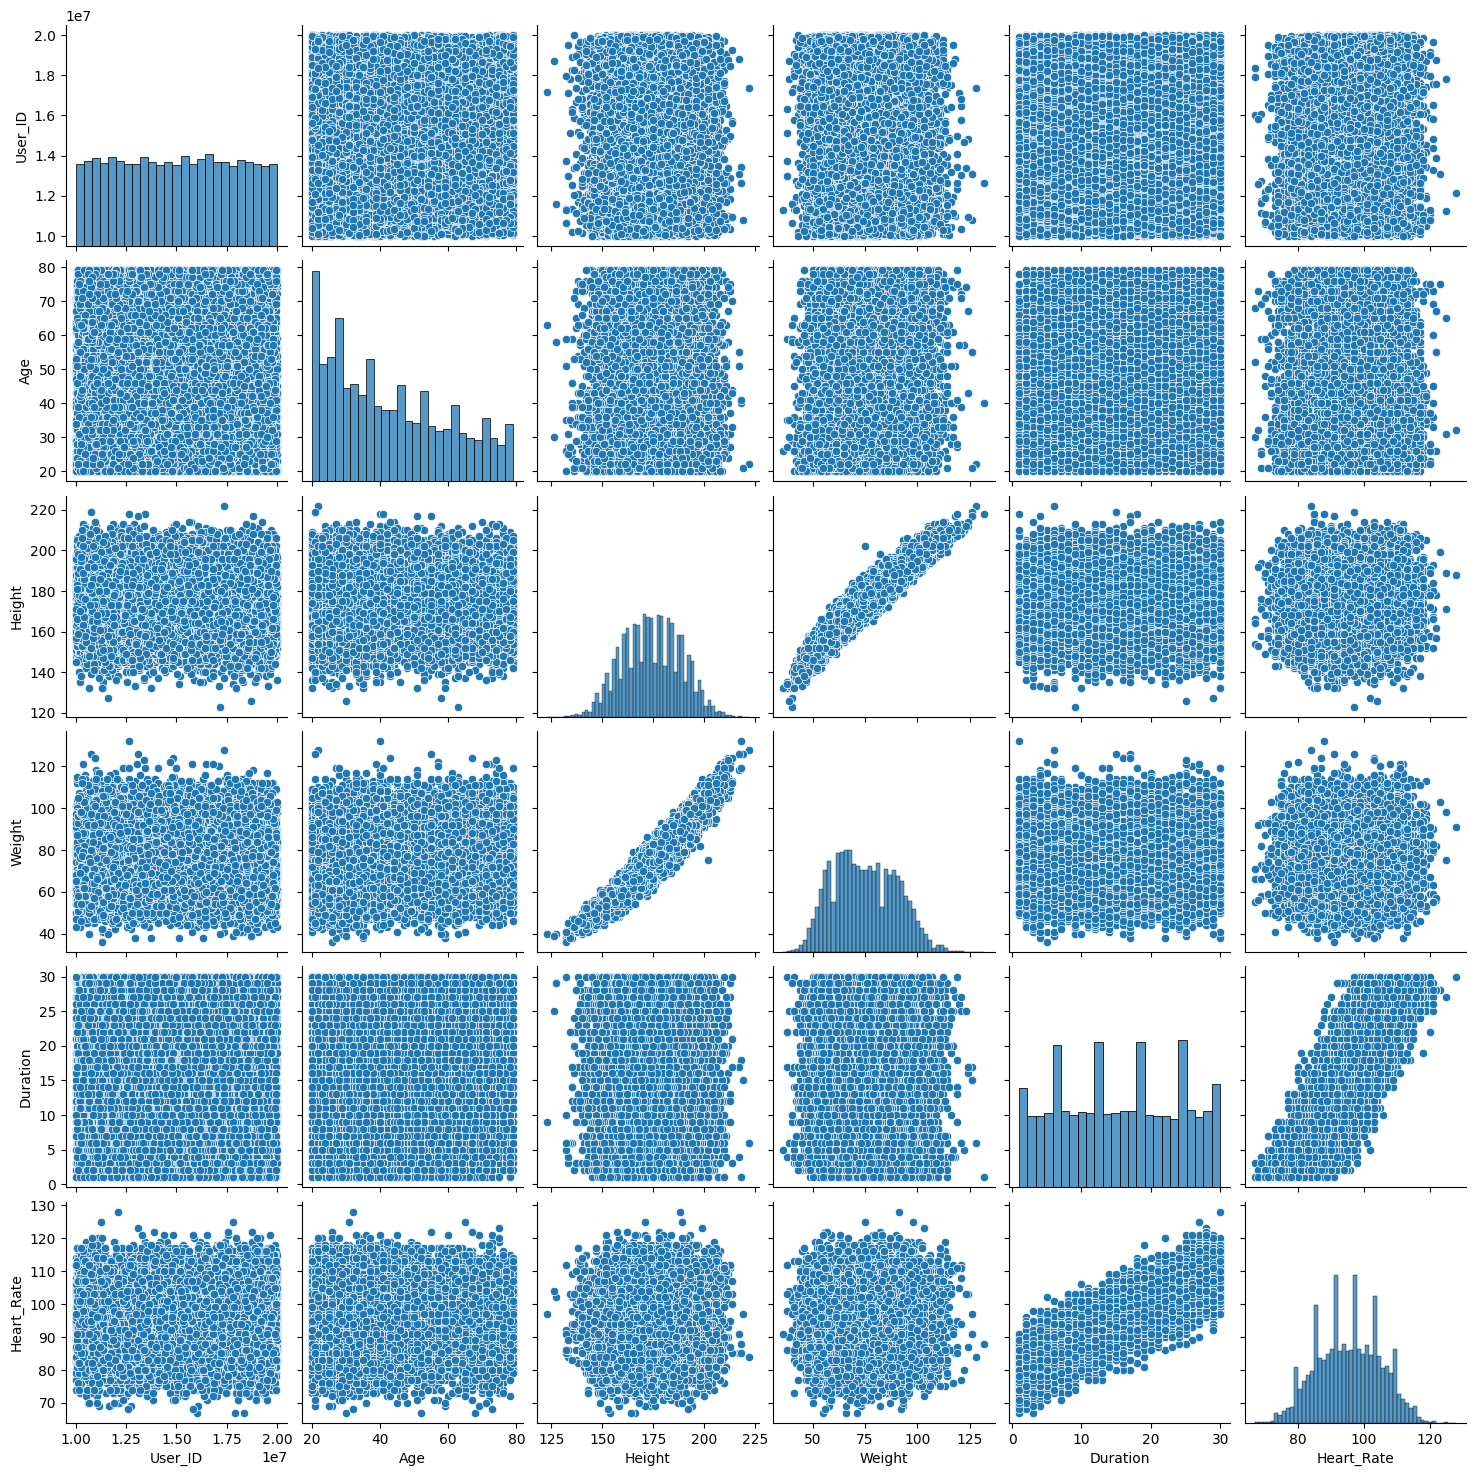

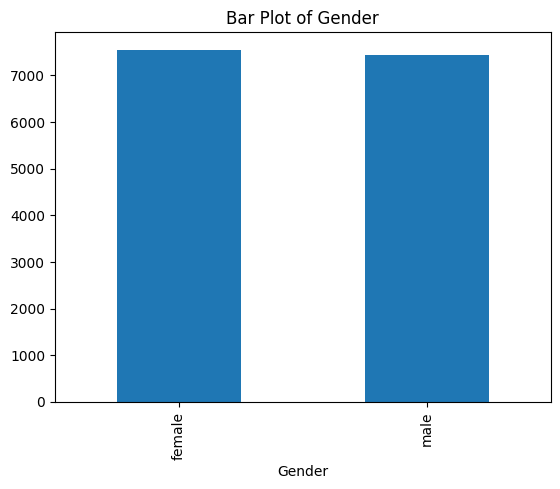

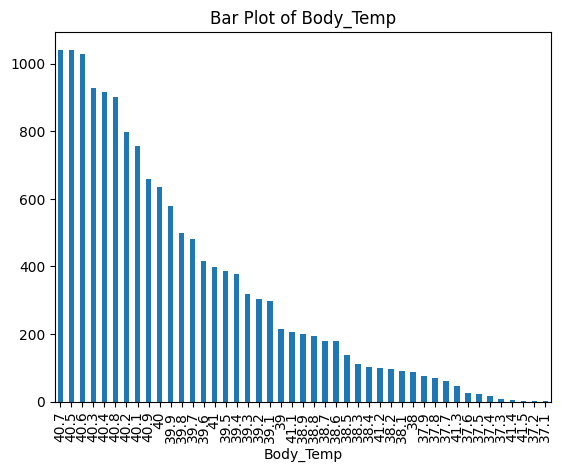

In [ ]:
sns.pairplot(data.select_dtypes(include=np.number))
plt.show()


Correlation Matrix

User_ID          int64
Gender        category
Age              int64
Height         float64
Weight         float64
Duration         int64
Heart_Rate     float64
Body_Temp     category
Cluster          int32
dtype: object
User_ID: [14733363 14861698 11179863 ... 17271188 18643037 11751526]
Age: [68 20 69 34 27 36 33 41 60 26 21 66 32 53 39 46 50 67 31 48 29 42 62 38
 25 24 22 74 70 44 61 63 54 47 35 28 77 64 45 57 49 40 55 23 43 52 79 51
 59 30 37 56 58 78 73 76 72 65 71 75]
Height: [190.         166.         179.         154.         151.
 158.         175.         186.         146.         177.
 157.         171.         182.         156.         169.
 188.         189.         148.         165.         176.
 173.         159.         183.         160.         184.
 155.         195.         152.         193.         168.
 174.         191.         164.         198.         170.
 167.         185.         163.         192.         178.
 197.         187.         144.         202.     

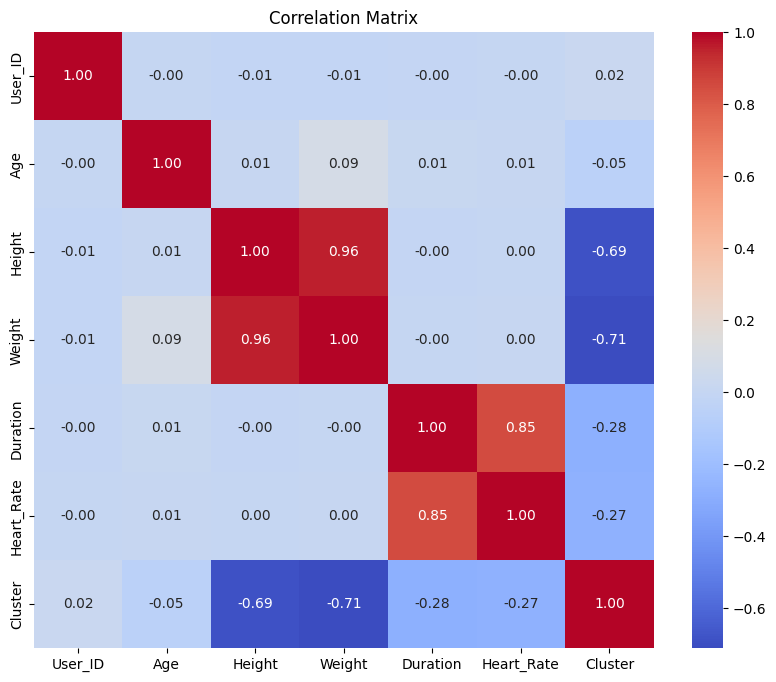

In [ ]:
print(data.dtypes)
for col in data.select_dtypes(include='number').columns:
    print(f"{col}: {data[col].unique()}")
data.replace("?", np.nan, inplace=True)
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col])
        except ValueError:
            pass
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
# Correlation matrix
cor_matrix = data.select_dtypes(include='number').corr()
print(cor_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Clustering

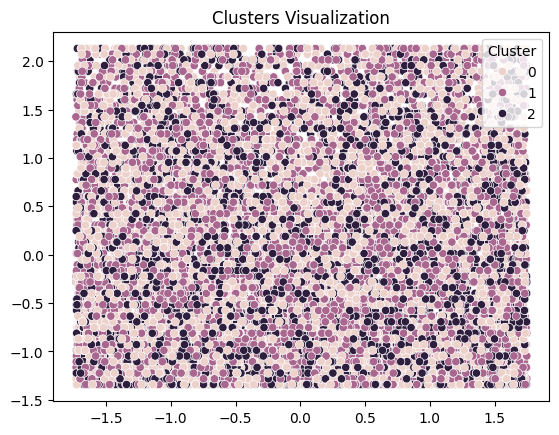

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=np.number))
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['Cluster'])
plt.title("Clusters Visualization")
plt.show()


Dimensionality Reduction

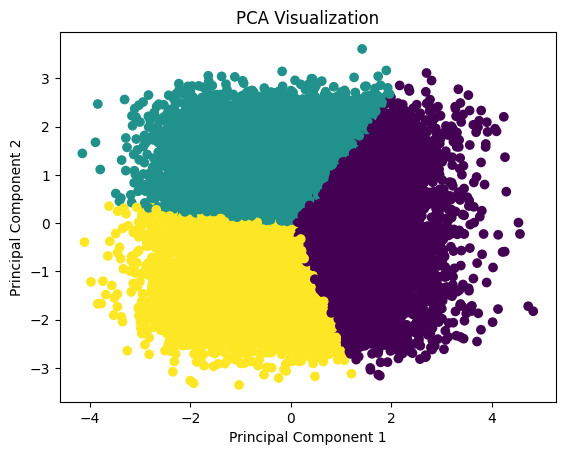

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'])
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Model Development and Evaluation

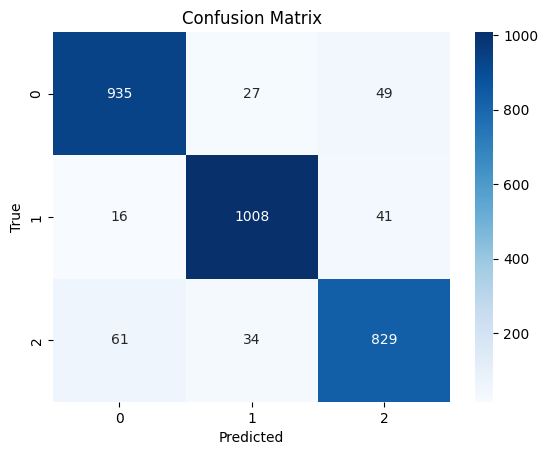

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1011
           1       0.94      0.95      0.94      1065
           2       0.90      0.90      0.90       924

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
if data['Cluster'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['Cluster'] = le.fit_transform(data['Cluster'])
X = data.select_dtypes(include=np.number).drop('Cluster', axis=1)
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
if len(data['Cluster'].unique()) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
